In [25]:
#!/usr/bin/env python3 -u
# Copyright (c) 2017-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the LICENSE file in
# the root directory of this source tree.
from __future__ import print_function

import argparse
import csv
import os

import numpy as np
import torch
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# import cv2 as cv2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from tqdm import tqdm

import surrounding_augmentation as sn
import environment_helpers as hp
from random import randrange
import pickle
from PIL import Image
#!pip install cifar2png




In [27]:
def augment_environment(image_batch,payload,showImage=-1):
 mean = payload['mean']
 std = payload['std']
 inv_normalize = transforms.Normalize(
    mean= [-m/s for m, s in zip(mean,std)],
    std= [1/s for s in std]
  )
 inv_tensor = inv_normalize(image_batch)*255
 inv_tensor = inv_tensor.permute(0,2,3,1)
 img_arr=inv_tensor.numpy().astype('uint8')
 aug_list=[]
 for i in range(len(img_arr)):
  aug_images= sn.augment_random(img_arr[i], aug_types=['random_brightness','add_gravel','add_snow','add_rain','add_autumn','random_flip','random_brightness'], volume='expand')  ##all aug_types are applied in both images
  rand_image=aug_images[randrange(7)]
  if showImage != -1:
    plt.imshow(rand_image)
    plt.show()
  rand_image=torch.from_numpy(np.transpose(rand_image, (2, 0, 1))).float()/255
  normalizer = transforms.Normalize(
    mean= mean,
    std= std
   )
  new_image=normalizer(rand_image)
  aug_list.append(new_image)
 aug_batch=torch.stack(aug_list)
 return aug_batch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


124
torch.Size([124, 3, 32, 32])
torch.Size([3, 32, 32])


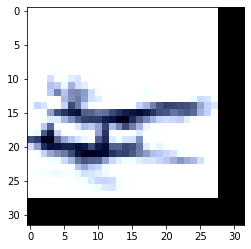

In [30]:
print(len(x))
aug_image_batch= augment_environment(x, payload={'mean':(0.4914, 0.4822, 0.4465),'std':(0.2023, 0.1994, 0.2010)})
print(aug_image_batch.shape)
print(aug_image_batch[0].shape)
plt.imshow(aug_image_batch[0].numpy().transpose(1,2,0))
plt.imshow(x[0].numpy().transpose(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


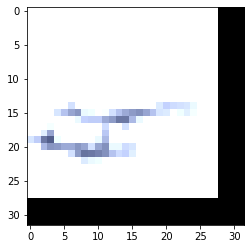

In [32]:
fil = augment_environment(torch.rand(10,3,32,32), payload={'mean':(0.4914, 0.4822, 0.4465),'std':(0.2023, 0.1994, 0.2010)})
fil.shape
plt.imshow(aug_image_batch[0].numpy().transpose(1,2,0))
# plt.imshow(x[0].numpy().transpose(1,2,0))

In [33]:
import pandas as pd

df = pd.read_csv("~/testing_codes/NNs/results/log_ResNet_ERM-128-WithAug_10.csv")
df[100:150]

,epoch,train loss,reg loss,train acc,test loss,test acc
100,100,0.057607,0.0,tensor(98.0100),0.322757,tensor(91.8800)
101,101,0.026324,0.0,tensor(99.1920),0.243425,tensor(93.5300)
102,102,0.013912,0.0,tensor(99.6620),0.237185,tensor(93.8800)
103,103,0.011395,0.0,tensor(99.7340),0.230944,tensor(94.0700)
104,104,0.009251,0.0,tensor(99.8100),0.230824,tensor(93.9800)
105,105,0.008516,0.0,tensor(99.8020),0.231385,tensor(94.0500)
106,106,0.007351,0.0,tensor(99.8600),0.233091,tensor(94.1100)
107,107,0.006813,0.0,tensor(99.8580),0.230079,tensor(94.1400)
108,108,0.006716,0.0,tensor(99.8560),0.229633,tensor(94.1900)
109,109,0.005453,0.0,tensor(99.9100),0.235254,tensor(94.0900)
